In [1]:
import os
os.getcwd()

'C:\\Users\\SRADHA\\Desktop\\Project\\Multiclass Classification'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('Iris flower data.csv')
df.head()

,studyName,Sample Number,Species,Island,Individual ID,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Torgersen,N1A1,11/11/2007,39.1,18.7,181,.,MALE,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Torgersen,N1A2,11/11/2007,39.5,17.4,186,3800,FEMALE,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Torgersen,N2A1,11/16/2007,40.3,18.0,.,3250,FEMALE,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Torgersen,N2A2,11/16/2007,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Torgersen,N3A1,11/16/2007,36.7,19.3,193,3450,FEMALE,NaN


In [4]:
df.shape

(344, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Island               344 non-null    object 
 4   Individual ID        344 non-null    object 
 5   Date Egg             344 non-null    object 
 6   Culmen Length (mm)   342 non-null    float64
 7   Culmen Depth (mm)    342 non-null    float64
 8   Flipper Length (mm)  342 non-null    object 
 9   Body Mass (g)        342 non-null    object 
 10  Sex                  334 non-null    object 
 11  Comments             26 non-null     object 
dtypes: float64(2), int64(1), object(9)
memory usage: 32.4+ KB


In [6]:
df.isnull().sum()

studyName                0
Sample Number            0
Species                  0
Island                   0
Individual ID            0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     10
Comments               318
dtype: int64

In [7]:
df.columns

Index(['studyName', 'Sample Number', 'Species', 'Island', 'Individual ID',
       'Date Egg', 'Culmen Length (mm)', 'Culmen Depth (mm)',
       'Flipper Length (mm)', 'Body Mass (g)', 'Sex', 'Comments'],
      dtype='object')

In [8]:
df.drop(['studyName','Sample Number','Individual ID','Date Egg','Comments'],inplace=True,axis=1)

In [9]:
df.head()

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.1,18.7,181,.,MALE
1,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.5,17.4,186,3800,FEMALE
2,Adelie Penguin (Pygoscelis adeliae),Torgersen,40.3,18.0,.,3250,FEMALE
3,Adelie Penguin (Pygoscelis adeliae),Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie Penguin (Pygoscelis adeliae),Torgersen,36.7,19.3,193,3450,FEMALE


In [10]:
df.isnull().sum()

Species                 0
Island                  0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Sex                    10
dtype: int64

In [11]:
df.isnull().sum()/len(df)*100

Species                0.000000
Island                 0.000000
Culmen Length (mm)     0.581395
Culmen Depth (mm)      0.581395
Flipper Length (mm)    0.581395
Body Mass (g)          0.581395
Sex                    2.906977
dtype: float64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Island               344 non-null    object 
 2   Culmen Length (mm)   342 non-null    float64
 3   Culmen Depth (mm)    342 non-null    float64
 4   Flipper Length (mm)  342 non-null    object 
 5   Body Mass (g)        342 non-null    object 
 6   Sex                  334 non-null    object 
dtypes: float64(2), object(5)
memory usage: 18.9+ KB


In [13]:
df['Flipper Length (mm)'].value_counts()

190    22
187    16
195    16
193    15
210    14
191    13
215    12
196    10
197    10
185     9
220     8
198     8
208     8
216     8
212     7
186     7
230     7
192     7
181     7
189     7
184     7
188     6
222     6
201     6
213     6
217     6
199     6
214     6
209     5
219     5
218     5
221     5
203     5
180     5
194     5
178     4
200     4
228     4
225     4
202     4
205     3
224     3
182     3
223     2
183     2
229     2
211     2
207     2
231     1
176     1
174     1
.       1
206     1
172     1
179     1
226     1
Name: Flipper Length (mm), dtype: int64

In [14]:
df['Flipper Length (mm)']=np.where(df['Flipper Length (mm)']=='.','190',df['Flipper Length (mm)'])

In [15]:
df['Flipper Length (mm)'].value_counts()

190    23
195    16
187    16
193    15
210    14
191    13
215    12
197    10
196    10
185     9
220     8
198     8
208     8
216     8
212     7
186     7
181     7
189     7
230     7
192     7
184     7
199     6
213     6
188     6
214     6
217     6
222     6
201     6
219     5
209     5
218     5
221     5
203     5
194     5
180     5
178     4
225     4
228     4
202     4
200     4
182     3
224     3
205     3
229     2
183     2
207     2
223     2
211     2
231     1
206     1
174     1
172     1
179     1
176     1
226     1
Name: Flipper Length (mm), dtype: int64

In [17]:
df['Flipper Length (mm)']=pd.to_numeric(df['Flipper Length (mm)'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Island               344 non-null    object 
 2   Culmen Length (mm)   342 non-null    float64
 3   Culmen Depth (mm)    342 non-null    float64
 4   Flipper Length (mm)  342 non-null    float64
 5   Body Mass (g)        342 non-null    object 
 6   Sex                  334 non-null    object 
dtypes: float64(3), object(4)
memory usage: 18.9+ KB


In [19]:
df['Body Mass (g)'].value_counts()

3800    12
3700    11
3900    10
3950    10
3550     9
        ..
4475     1
3975     1
3575     1
3850     1
5750     1
Name: Body Mass (g), Length: 95, dtype: int64

In [20]:
df['Body Mass (g)']=np.where(df['Body Mass (g)']=='.','3800',df['Body Mass (g)'])

In [21]:
df['Body Mass (g)'].value_counts()

3800    13
3700    11
3900    10
3950    10
3550     9
        ..
4475     1
3975     1
3575     1
3850     1
5750     1
Name: Body Mass (g), Length: 94, dtype: int64

In [22]:
df['Body Mass (g)']=pd.to_numeric(df['Body Mass (g)'])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Island               344 non-null    object 
 2   Culmen Length (mm)   342 non-null    float64
 3   Culmen Depth (mm)    342 non-null    float64
 4   Flipper Length (mm)  342 non-null    float64
 5   Body Mass (g)        342 non-null    float64
 6   Sex                  334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [24]:
df.isnull().sum()

Species                 0
Island                  0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Sex                    10
dtype: int64

<AxesSubplot:ylabel='Culmen Length (mm)'>

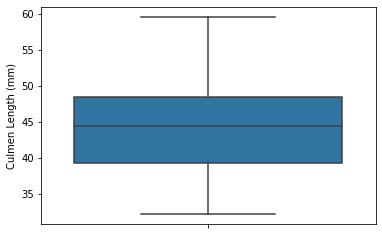

In [25]:
sns.boxplot(y='Culmen Length (mm)',data=df)

<AxesSubplot:ylabel='Culmen Depth (mm)'>

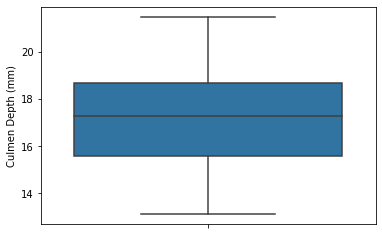

In [26]:
sns.boxplot(y='Culmen Depth (mm)',data=df)

<AxesSubplot:ylabel='Flipper Length (mm)'>

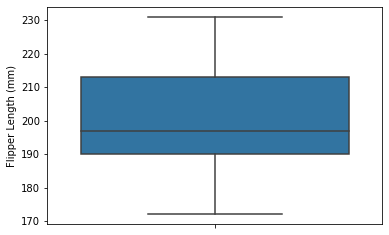

In [27]:
sns.boxplot(y='Flipper Length (mm)',data=df)

<AxesSubplot:ylabel='Body Mass (g)'>

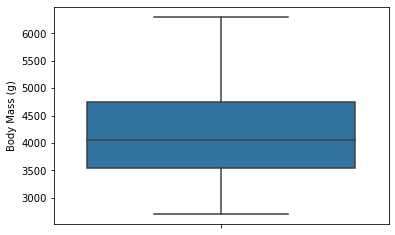

In [28]:
sns.boxplot(y='Body Mass (g)',data=df)

In [29]:
df['Culmen Length (mm)']=df['Culmen Length (mm)'].fillna(df['Culmen Length (mm)'].mean())

In [30]:
df['Culmen Depth (mm)']=df['Culmen Depth (mm)'].fillna(df['Culmen Depth (mm)'].mean())

In [31]:
df['Flipper Length (mm)']=df['Flipper Length (mm)'].fillna(df['Flipper Length (mm)'].mean())

In [32]:
df['Body Mass (g)']=df['Body Mass (g)'].fillna(df['Body Mass (g)'].mean())

In [33]:
df['Sex'].value_counts()

MALE      168
FEMALE    165
.           1
Name: Sex, dtype: int64

In [34]:
df['Sex']=np.where(df['Sex']=='.','MALE',df['Sex'])

In [35]:
df['Sex'].value_counts()

MALE      169
FEMALE    165
Name: Sex, dtype: int64

In [36]:
df['Sex']=df['Sex'].fillna('MALE')

In [37]:
df.isnull().sum()

Species                0
Island                 0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
dtype: int64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Island               344 non-null    object 
 2   Culmen Length (mm)   344 non-null    float64
 3   Culmen Depth (mm)    344 non-null    float64
 4   Flipper Length (mm)  344 non-null    float64
 5   Body Mass (g)        344 non-null    float64
 6   Sex                  344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [39]:
df['Species']=df['Species'].astype('category')
df['Species']=df['Species'].cat.codes
df.head()
# Not creating dummy variable as the feature is the dependent variable

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,0,Torgersen,39.10000,18.70000,181.000000,3800.000000,MALE
1,0,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,0,Torgersen,40.30000,18.00000,190.000000,3250.000000,FEMALE
3,0,Torgersen,43.92193,17.15117,200.900585,4201.900585,MALE
4,0,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE


In [40]:
df['Island']=df['Island'].astype('category')
df['Island']=df['Island'].cat.codes

df['Sex']=df['Sex'].astype('category')
df['Sex']=df['Sex'].cat.codes

In [41]:
df=pd.get_dummies(df, columns=['Island','Sex'])

In [42]:
df.head()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Island_0,Island_1,Island_2,Sex_0,Sex_1
0,0,39.10000,18.70000,181.000000,3800.000000,0,0,1,0,1
1,0,39.50000,17.40000,186.000000,3800.000000,0,0,1,1,0
2,0,40.30000,18.00000,190.000000,3250.000000,0,0,1,1,0
3,0,43.92193,17.15117,200.900585,4201.900585,0,0,1,0,1
4,0,36.70000,19.30000,193.000000,3450.000000,0,0,1,1,0


In [43]:
df=df.drop(['Island_0','Sex_0'],axis=1)

In [44]:
df.head()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Island_1,Island_2,Sex_1
0,0,39.10000,18.70000,181.000000,3800.000000,0,1,1
1,0,39.50000,17.40000,186.000000,3800.000000,0,1,0
2,0,40.30000,18.00000,190.000000,3250.000000,0,1,0
3,0,43.92193,17.15117,200.900585,4201.900585,0,1,1
4,0,36.70000,19.30000,193.000000,3450.000000,0,1,0


Number of Male: 179
Number of Female: 165


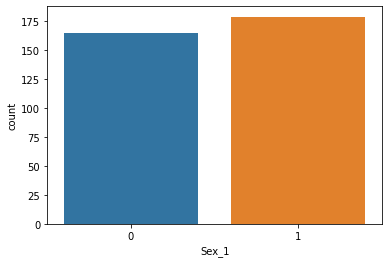

In [46]:
sns.countplot(data=df,x='Sex_1')
Male,Female=df['Sex_1'].value_counts()
print('Number of Male:',Male)
print('Number of Female:',Female)
plt.show()

Number of A: 152
Number of B: 124
Number of C: 68


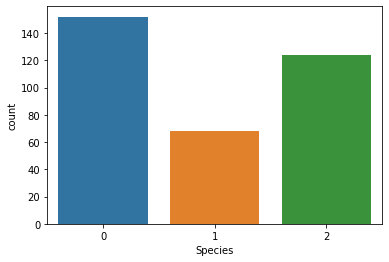

In [47]:
sns.countplot(data=df,x='Species')
A,B,C=df['Species'].value_counts()
print('Number of A:',A)
print('Number of B:',B)
print('Number of C:',C)
plt.show()

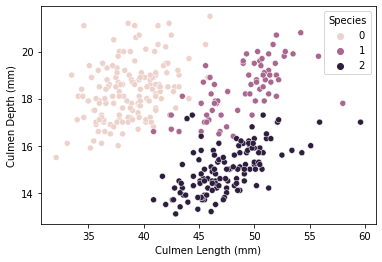

In [48]:
sns.scatterplot(x='Culmen Length (mm)',y='Culmen Depth (mm)',data=df,hue='Species')
plt.show()

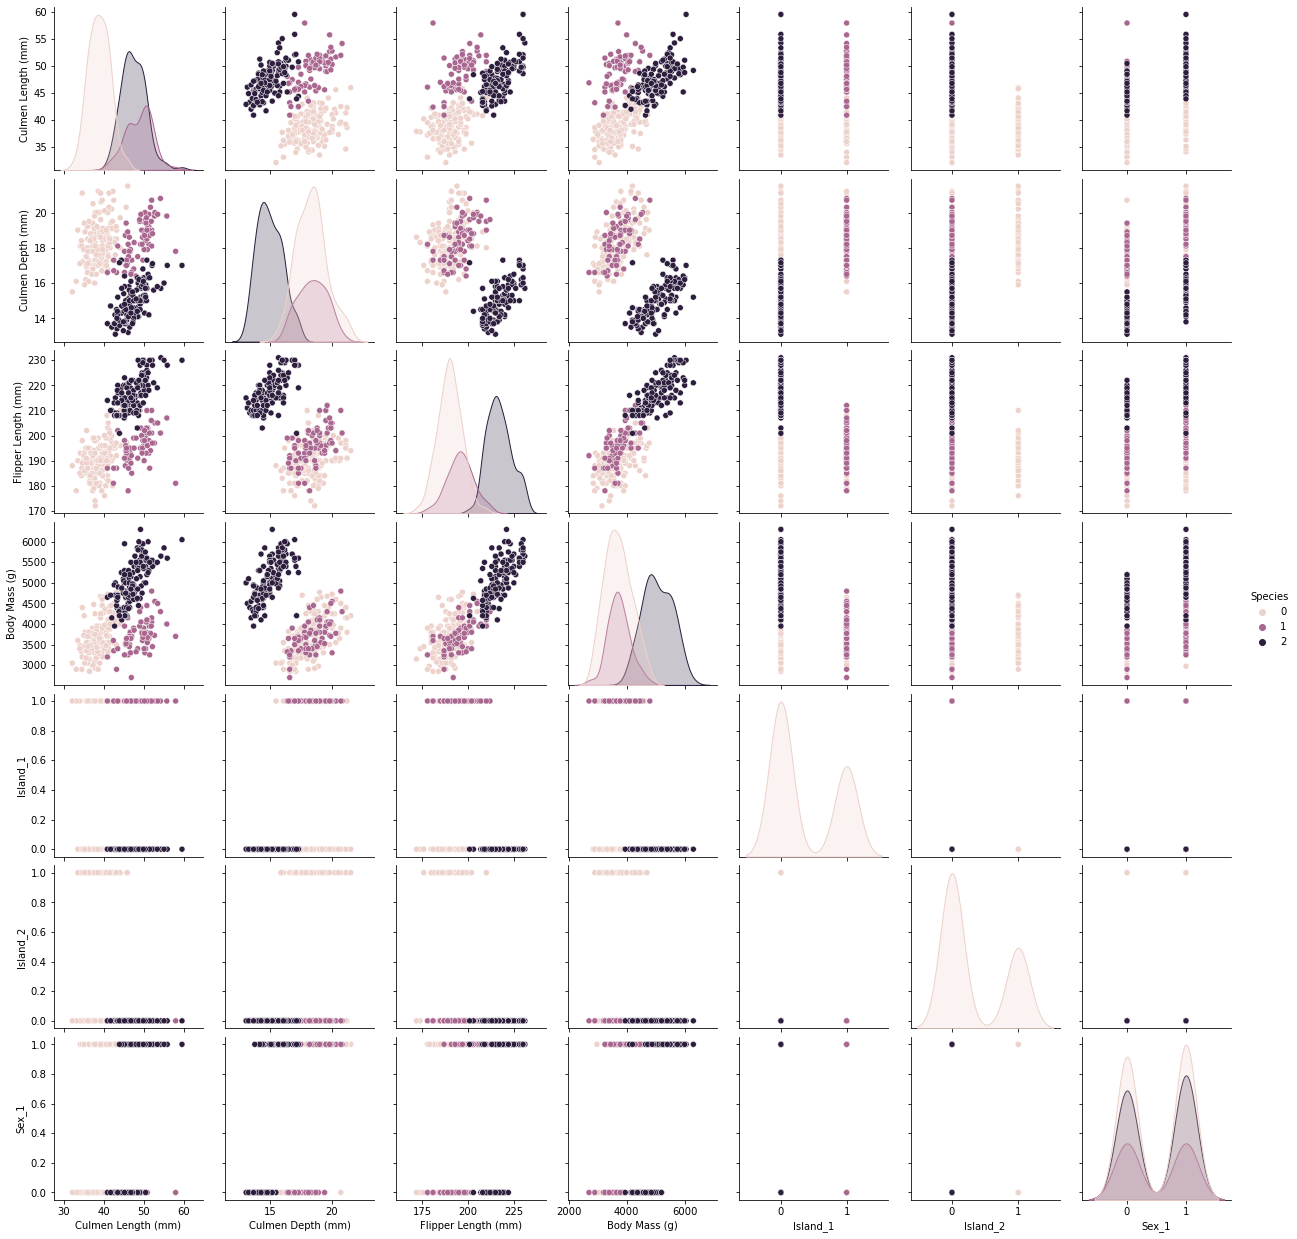

In [49]:
sns.pairplot(data=df,hue='Species')

<AxesSubplot:>

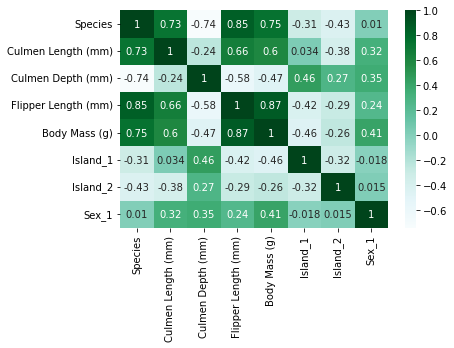

In [52]:
sns.heatmap(df.corr(),annot=True,cmap='BuGn')

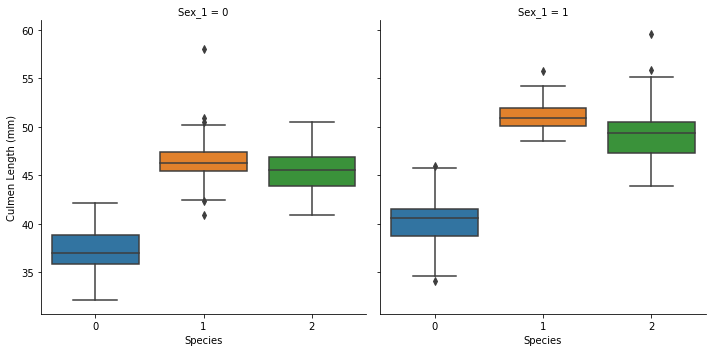

In [53]:
sns.catplot(data=df,x='Species',y='Culmen Length (mm)',kind='box',col='Sex_1')

# Splitting the data into Independent and dependent variables

In [54]:
x=df.iloc[:,1:]
y=df['Species']

In [55]:
x.head()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Island_1,Island_2,Sex_1
0,39.10000,18.70000,181.000000,3800.000000,0,1,1
1,39.50000,17.40000,186.000000,3800.000000,0,1,0
2,40.30000,18.00000,190.000000,3250.000000,0,1,0
3,43.92193,17.15117,200.900585,4201.900585,0,1,1
4,36.70000,19.30000,193.000000,3450.000000,0,1,0


In [56]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int8

# Splitting the data into training and test data

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=101)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(258, 7)
(86, 7)
(258,)
(86,)


# Decision Tree Model Building

In [61]:
from sklearn.tree import DecisionTreeClassifier
dt1=DecisionTreeClassifier(criterion='gini')
dt2=DecisionTreeClassifier(criterion='entropy')

dt1.fit(x_train,y_train)
dt2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

# Predicting test data by using Decision Tree Model


In [62]:
y_pred_train_1=dt1.predict(x_train)
y_pred_test_1=dt1.predict(x_test)

y_pred_train_2=dt2.predict(x_train)
y_pred_test_2=dt2.predict(x_test)

In [63]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [66]:
print(classification_report(y_train,y_pred_train_1))
print('######'*20)
print(classification_report(y_train,y_pred_train_2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       1.00      1.00      1.00        47
           2       1.00      1.00      1.00        96

    accuracy                           1.00       258
   macro avg       1.00      1.00      1.00       258
weighted avg       1.00      1.00      1.00       258

########################################################################################################################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       1.00      1.00      1.00        47
           2       1.00      1.00      1.00        96

    accuracy                           1.00       258
   macro avg       1.00      1.00      1.00       258
weighted avg       1.00      1.00      1.00       258



In [68]:
print(classification_report(y_test,y_pred_test_1))
print('######'*20)
print(classification_report(y_test,y_pred_test_2))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        37
           1       0.95      0.95      0.95        21
           2       0.97      1.00      0.98        28

    accuracy                           0.98        86
   macro avg       0.97      0.98      0.97        86
weighted avg       0.98      0.98      0.98        86

########################################################################################################################
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        37
           1       0.91      0.95      0.93        21
           2       1.00      1.00      1.00        28

    accuracy                           0.97        86
   macro avg       0.96      0.97      0.96        86
weighted avg       0.97      0.97      0.97        86



In [69]:
print(confusion_matrix(y_train,y_pred_train_1))
print('######'*20)
print(confusion_matrix(y_train,y_pred_train_2))

[[115   0   0]
 [  0  47   0]
 [  0   0  96]]
########################################################################################################################
[[115   0   0]
 [  0  47   0]
 [  0   0  96]]


In [70]:
print(confusion_matrix(y_test,y_pred_test_1))
print('######'*20)
print(confusion_matrix(y_test,y_pred_test_2))

[[36  1  0]
 [ 0 20  1]
 [ 0  0 28]]
########################################################################################################################
[[35  2  0]
 [ 1 20  0]
 [ 0  0 28]]


In [71]:
print(accuracy_score(y_train,y_pred_train_1))
print('######'*20)
print(accuracy_score(y_train,y_pred_train_2))

1.0
########################################################################################################################
1.0


In [73]:
print(accuracy_score(y_test,y_pred_test_1))
print('######'*20)
print(accuracy_score(y_test,y_pred_test_2))

0.9767441860465116
########################################################################################################################
0.9651162790697675


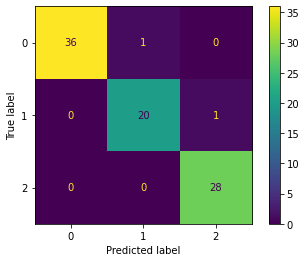

In [74]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dt1,x_test,y_test)
plt.show()

In [75]:
pd.DataFrame(index=x.columns,data=dt1.feature_importances_)

,0
Culmen Length (mm),0.334118
Culmen Depth (mm),0.044246
Flipper Length (mm),0.542128
Body Mass (g),0.029238
Island_1,0.026674
Island_2,0.015389
Sex_1,0.008207


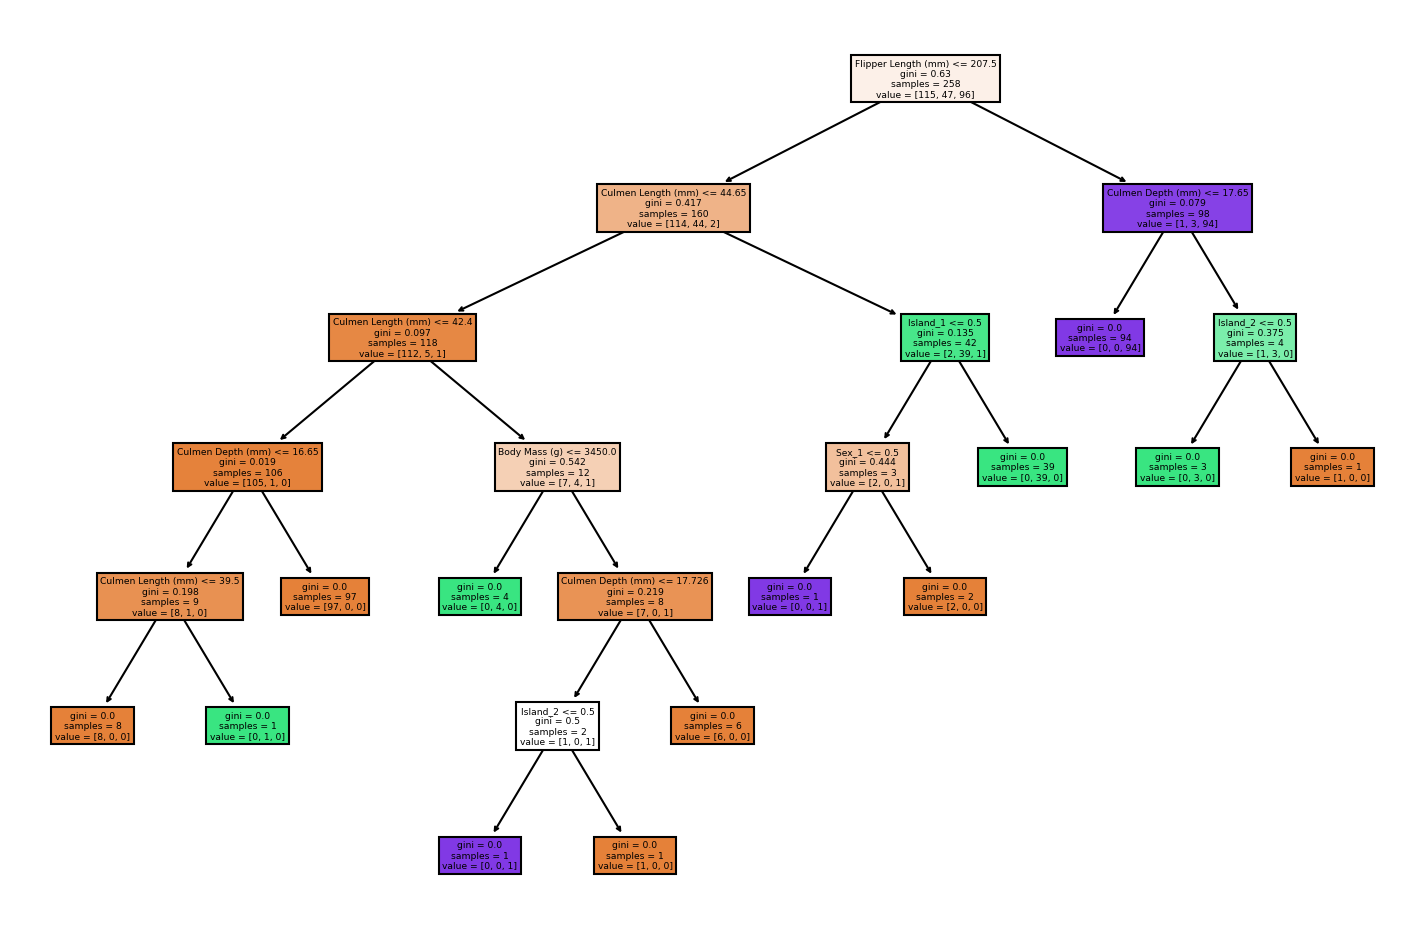

In [78]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8),dpi=150)
plot_tree(dt1,filled=True,feature_names=x.columns)
plt.show()

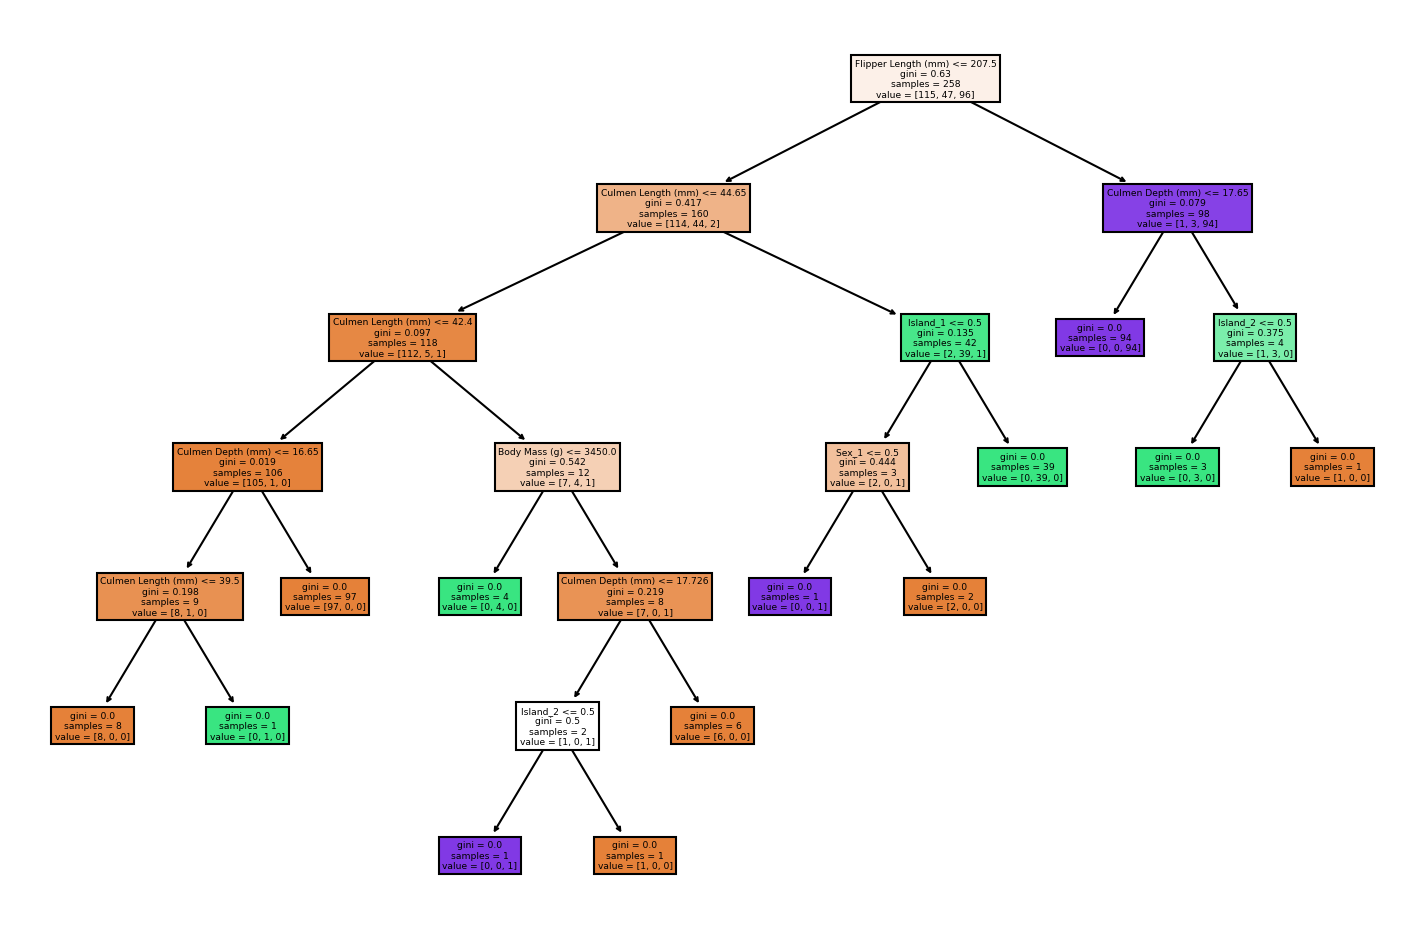

In [79]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8),dpi=150)
plot_tree(dt1,filled=True,feature_names=x.columns)
plt.show()

In [80]:
# User-Defined function

def report_model(model):
    model_preds=model.predict(x_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True,feature_names=x.columns)

In [81]:
# Hyperparameters in DT
prunned_tree=DecisionTreeClassifier(max_depth=2)
prunned_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        37
           1       0.87      0.95      0.91        21
           2       1.00      0.96      0.98        28

    accuracy                           0.95        86
   macro avg       0.95      0.95      0.95        86
weighted avg       0.96      0.95      0.95        86





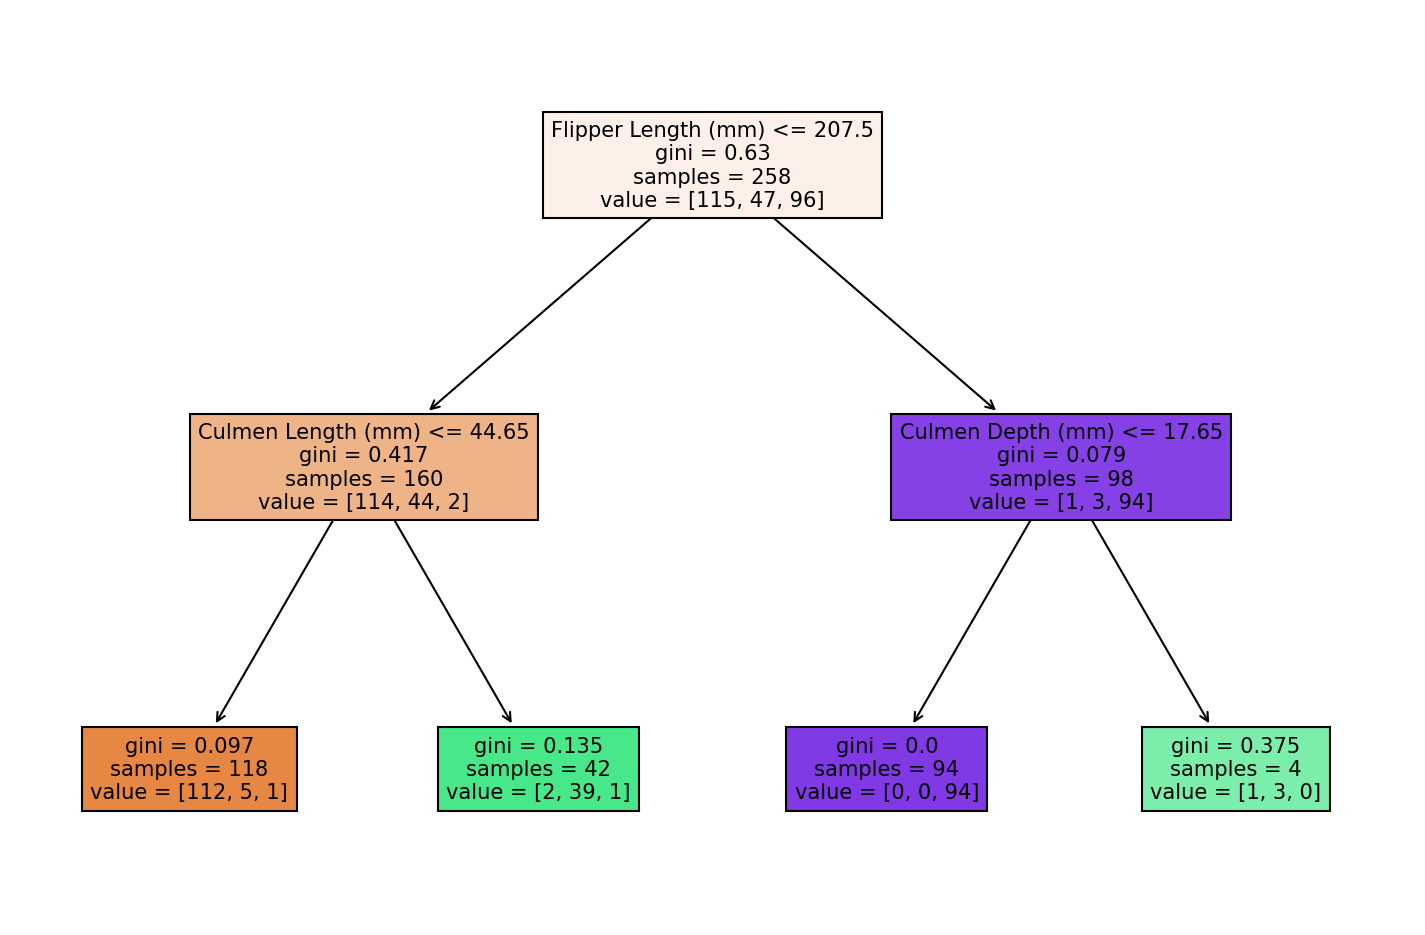

In [82]:
report_model(prunned_tree)

In [83]:
prunned_tree1=DecisionTreeClassifier(max_leaf_nodes=3)
prunned_tree1.fit(x_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        37
           1       0.90      0.90      0.90        21
           2       0.93      0.96      0.95        28

    accuracy                           0.94        86
   macro avg       0.94      0.94      0.94        86
weighted avg       0.94      0.94      0.94        86





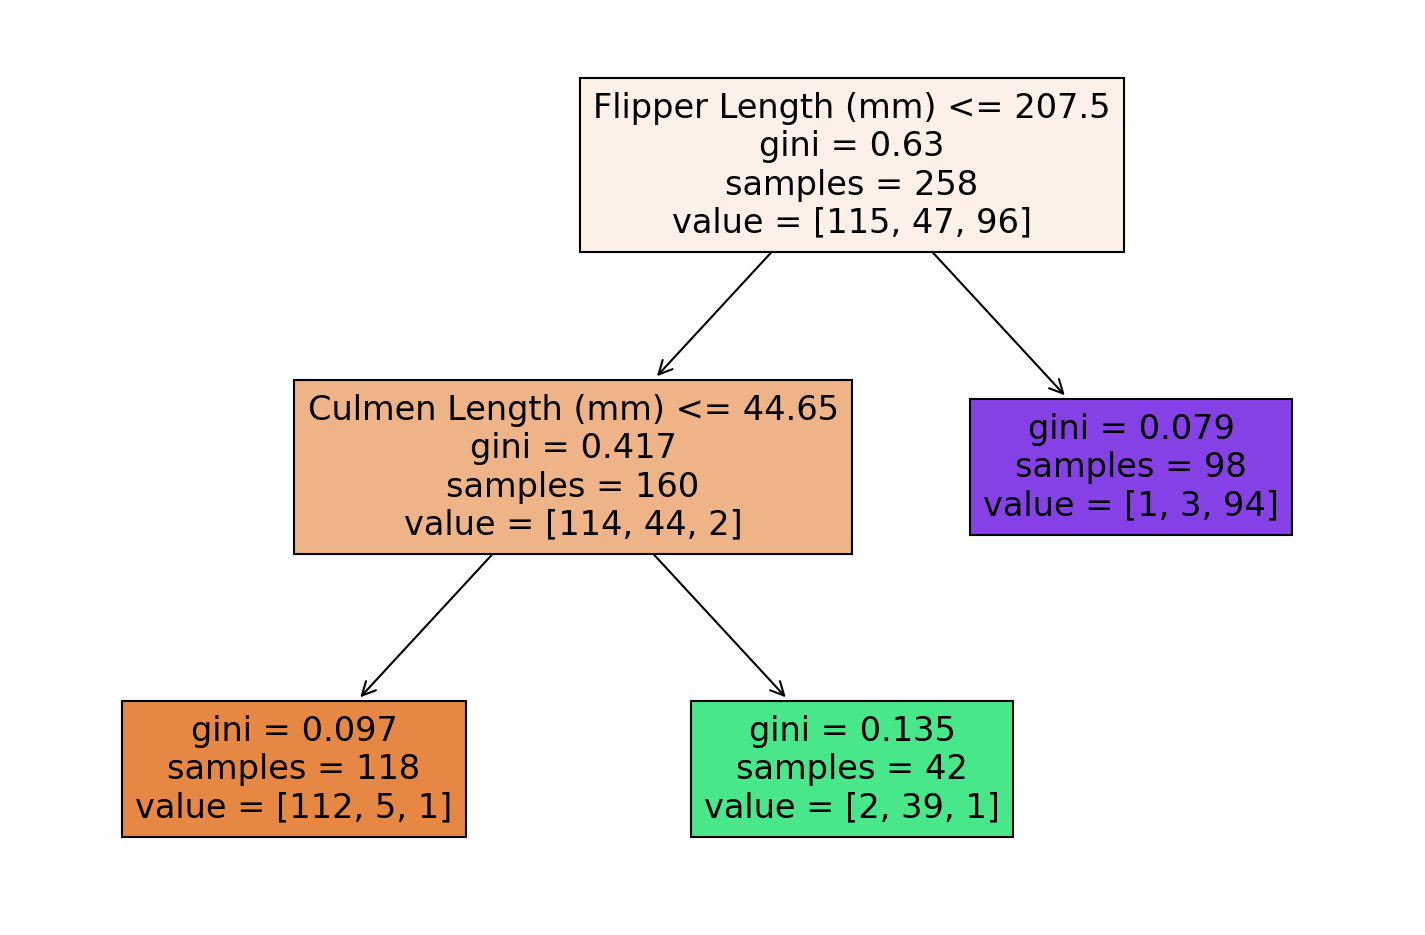

In [84]:
report_model(prunned_tree1)